In [97]:
import networkx as nx
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#import packages 
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import data_io as myIO 
import functional_brain_community as fbn 
import seaborn as sns

from collections import Counter
import networkx as nx
from math import log
from matplotlib import pyplot as plt
from tqdm import tqdm
import bct
import matplotlib.cm as cm
from sklearn.metrics.cluster import normalized_mutual_info_score
 
            

In [ ]:

# >>> G = nx.read_graphml('100206_repeated10_scale33.graphml')
# >>> nx.draw(G)
# >>> #plt.show()
# for node in G.nodes(data=True):
#     print(node)

# Functions

In [5]:
# folder_names = ["/content/gdrive/MyDrive/129", "/content/gdrive/MyDrive/234", "/content/gdrive/MyDrive/463", "/content/gdrive/MyDrive/86"]


# #Iterate over the folders
# for folder_name in folder_names:
#     folder_path = os.path.join("/path/to/main/folder", folder_name)
    

In [85]:
#June 1st 
#author: Alison Frayne 


def get_clusters(partition):
    """
    Convert partition format to a list of clusters format
    :param partition: community structure breakdown (list with a community number at the node's index)
    :return: community cluster format, where the nodes within the same community are listed together.
    """
    c = Counter(partition)
    N = len(c)
    reindex = dict(zip(c.keys(), range(N)))
    
    clustering = {i: [] for i in range(N)}
    for node, k in enumerate(partition):
        clustering[reindex[k]].append(node)
    return clustering


def get_values(module,data):
    #print(data)
    clustering = get_clusters(module)
    PC_list =get_PC(data,clustering)
    Z_list = get_Z(data,clustering)
    return(PC_list,Z_list)

def get_PC(data,clustering):
    degree = np.sum(data,axis=0) 
    PC_list = [] 
    for i in range(len(data)):
        PC = 0
        for m,nodes in clustering.items():
            if degree[i] == 0:
                PC = 1
            else:
                PC += (np.sum(data[i,nodes])/degree[i])**2
        PC_list.append(1 - PC)
    return PC_list  



def get_Z(A,partition):
    res = np.zeros(83)
    for m,nodes in partition.items():
        temp = A[nodes][:,nodes]
        k_i = np.sum(temp,axis=0)
        mean_k = np.mean(k_i)
        sig_k = np.std(k_i)
        if sig_k == 0:
            z_i=0
        else:
            z_i = (k_i-mean_k)/sig_k
        res[nodes] = z_i
    return(res) 

# z-score for 86 nodes

In [105]:
# ./repeated_x/<file_name>

importlib.reload(myIO)
avg_mat = myIO.avg_data('./repeated_10_scale_33/')




  0%|                                                                      | 0/2 [00:00<?, ?it/s]


In [106]:
# partition_0, modularity_0 = fbn.get_partitions(avg_mat, gamma=0.6, rep=100)
# partition_1, modularity_1 = fbn.get_partitions(avg_mat, gamma=1, rep=100)
# partition_2, modularity_2 = fbn.get_partitions(avg_mat, gamma=1.2, rep=100)
# modularity_1
l = 200
delta = (2-0.3)/l
data ={'gamma':[],'Q':[],'partition':[],'num_m':[]}
for i in range(l):
    g = 0.3 + i* delta
    p,m = fbn.get_partitions(avg_mat, gamma=g, rep=100)
    #m = np.array(m)
#     print(m[0])
#     print(len(p), len(p[0]),p[0])
    i_m = np.argmax(np.array(m))
    data['gamma'].append(g)
    data['Q'].append(m[i_m])
    data['partition'].append(p[i_m])
    #print(Counter(p[i_m]))
    data['num_m'].append(len(Counter(p[i_m])))
#1.3030000000000002


# vary gamma between 0.5 - 1.2
#print( partition_2)

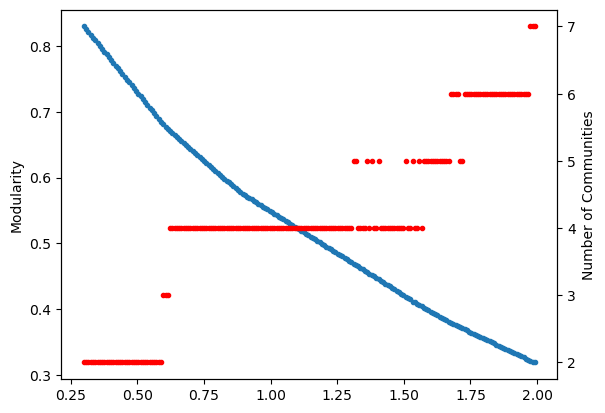

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7]
119
1.3115
120
1.32
125
1.3625
127
1.3795000000000002
130
1.405
142
1.5070000000000001
145
1.5325000000000002
148
1.558
150
1.5750000000000002
151
1.5835000000000001
152
1.592
153
1.6005
154
1.6090000000000002
155
1.6175000000000002
156
1.6260000000000001
157
1.6345
158
1.6430000000000002
159
1.6515000000000002
160
1.6600000000000001
161
1.6685
166
1.711
167
1.7195000000000003


In [107]:
fig= plt.figure()
ax = fig.add_subplot(111)
plt.plot(data['gamma'],data['Q'],'.')
ax2 = ax.twinx()
ax2.plot(data['gamma'],data['num_m'],'.', color='r')
# #plt.plot(PC, 0.0* +1, 'k', lw=.5)
# plt.axhline(y = 1, color = 'k', ls='-', lw=.5)
# #non-hub nodes
# plt.vlines(x=0.05, ymin=-2, ymax=1, colors='k', ls='-', lw=.5)
# plt.vlines(x=0.625, ymin=-2, ymax=1, colors='k', ls='-', lw=.5)
# plt.vlines(x=0.8, ymin=-2, ymax=1, colors='k', ls='-', lw=.5)
# #hub nodes
# plt.vlines(x=0.03, ymin=1, ymax=2.5, colors='k', ls='-', lw=.5)
# plt.vlines(x=0.75, ymin=1, ymax=2.5, colors='k', ls='-', lw=.5)
plt.xlabel('gamma')
ax.set_ylabel('Modularity')
ax2.set_ylabel("Number of Communities")
# plt.xlim(-0.025,1)
# plt.ylim(-2,2.5)
plt.show()

print( data['num_m'])
for i in range(len(data['num_m'])):
    if data['num_m'][i] == 5:
        print(i)
        print(data['gamma'][i])
    


In [113]:
# partition_0, modularity_0 = fbn.get_partitions(avg_mat, gamma=0.6, rep=100)
# partition_1, modularity_1 = fbn.get_partitions(avg_mat, gamma=1, rep=100)
# partition_2, modularity_2 = fbn.get_partitions(avg_mat, gamma=1.2, rep=100)
# modularity_1
l = 200
g = 1.32
# data ={'gamma':[],'Q':[],'partition':[],'num_m':[]}

p,m = fbn.get_partitions(avg_mat, gamma=g, rep=100)
#m = np.array(m)
#     print(m[0])
#     print(len(p), len(p[0]),p[0])

#1.3030000000000002


# vary gamma between 0.5 - 1.2
#print( partition_2)

In [114]:
num_com = []
for i in range(len(p)):
    num_com.append(len(Counter(p[i])))
    
print(num_com)

[4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


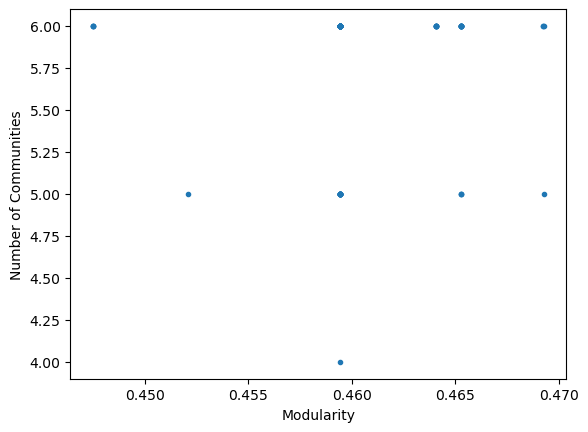

31
7 5 0.45944523684098404
15 5 0.45944523684098404
17 5 0.45944290065869176
31 5 0.46926758828730997
36 5 0.4652522592776469
49 5 0.45944523684098404
51 5 0.45944523684098404
58 5 0.45944290065869176
62 5 0.4652522592776469
64 5 0.4652522592776469
72 5 0.45944290065869176
74 5 0.45944523684098404
75 5 0.45944290065869176
81 5 0.45944290065869176
85 5 0.45944523684098404
89 5 0.45944523684098404
91 5 0.45944523684098404
94 5 0.45944523684098404
97 5 0.4521054426161919


In [109]:
fig= plt.figure()
ax = fig.add_subplot(111)
plt.plot(m,num_com,'.')
# ax2 = ax.twinx()
# ax2.plot(data['q'],data['num_m'],'.', color='r')
# #plt.plot(PC, 0.0* +1, 'k', lw=.5)
# plt.axhline(y = 1, color = 'k', ls='-', lw=.5)
# #non-hub nodes
# plt.vlines(x=0.05, ymin=-2, ymax=1, colors='k', ls='-', lw=.5)
# plt.vlines(x=0.625, ymin=-2, ymax=1, colors='k', ls='-', lw=.5)
# plt.vlines(x=0.8, ymin=-2, ymax=1, colors='k', ls='-', lw=.5)
# #hub nodes
# plt.vlines(x=0.03, ymin=1, ymax=2.5, colors='k', ls='-', lw=.5)
# plt.vlines(x=0.75, ymin=1, ymax=2.5, colors='k', ls='-', lw=.5)
# plt.xlabel('gamma')
plt.xlabel('Modularity')
plt.ylabel("Number of Communities")
# plt.xlim(-0.025,1)
# plt.ylim(-2,2.5)
plt.show()

print(np.argmax(np.array(m)))
# print(len(p[32]))
# partition = p[32]

# print( )
for i in range(len(m)):
    if num_com[i] == 5:
        print(i,num_com[i], m[i])

ValueError: AxesSubplot(0.125,0.11;0.775x0.77) has no legend attached.

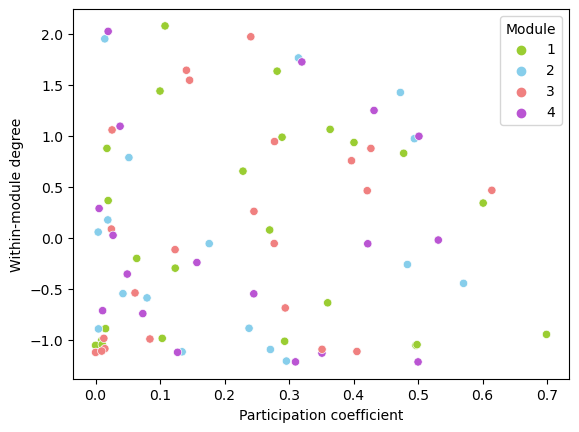

In [125]:
PC = [] #PC 
Z = [] #Z

# partition = p[np.argmax(np.array(m))]
PC,Z = get_values(partition,avg_mat)
df_plot = pd.DataFrame(data={"Within-module degree": Z})
df_plot['Participation coefficient'] = PC
df_plot["Module"] = partition
# plt.figure()
# plt.plot(PC,Z,'.')
# plt.xlabel('PC +')
# plt.ylabel('Z-score +')
# # plt.ylim(-0.05,5)
# plt.show()

ICN_COLORS_HEX = {1: "yellowgreen", 2: "skyblue", 3: "lightcoral", 4: "mediumorchid", 5: "gold"}
metric = "Within-module degree" 
#nodes PC vs Z
#fig, ax = plt.subplots(figsize=(16,8))
#rq, pv = ov_func.get_linear_regression_stats(flexibility, "pc EF +", metric)
sns.scatterplot(data=df_plot, x="Participation coefficient", y=metric, hue="Module", palette=ICN_COLORS_HEX)

#df_sub = df[(df["within module degree"] >= 1) | (df["node number"]==14) | (df["node number"]==3) | (df["node number"]==0) | (df["node number"]==2)]
# df_sub = df[(df["node number"]==17) | (df["node number"]==12) | (df["node number"]==14) | (df["node number"]==0) | (df["node number"]==7)]
# for row in df_sub.to_dict(orient="records"): 
# #for row in df.to_dict(orient="records"): 
#     plt.annotate(row["node number"], (row["participation coefficient"]+0.01, row["within module degree"]), fontsize=10)
        
#sns.regplot(data=flexibility, x="pc EF", y=metric, scatter=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.axhline(y = 1, color = 'k', ls='-', lw=.5)
# #non-hub nodes
# plt.vlines(x=0.05, ymin=-2, ymax=1, colors='k', ls='-', lw=.5)
# plt.vlines(x=0.625, ymin=-2, ymax=1, colors='k', ls='-', lw=.5)
# plt.vlines(x=0.8, ymin=-2, ymax=1, colors='k', ls='-', lw=.5)
# #hub nodes
# plt.vlines(x=0.03, ymin=1, ymax=2.5, colors='k', ls='-', lw=.5)
# plt.vlines(x=0.75, ymin=1, ymax=2.5, colors='k', ls='-', lw=.5)
# plt.xlim(-.025,1)
# plt.ylim(-2,2.5)
plt.title(f"{metric} vs Participation Coefficent, PC")


array([[<AxesSubplot:title={'center':'Within-module degree'}>]],
      dtype=object)

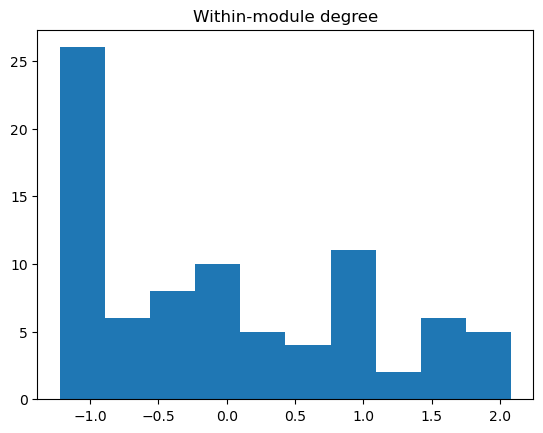

In [128]:
# plot_df = pd.DataFrame(data={"Z-score": Z})
df_plot.hist(column='Within-module degree', grid=False)